In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U statsmodels

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: statsmodels in /home/avik/.local/lib/python3.8/site-packages (0.11.1)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: scikit-learn in /home/avik/.local/lib/python3.8/site-packages (0.23.1)
Note: you may need to restart the kernel to use updated packages.


In [5]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

<ipython-input-5-5eebc7132e0e>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [6]:
def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')

series = read_csv('AAPL.csv', header=0, parse_dates=[0], index_col=0, usecols=[0, 2], squeeze=True, date_parser=parser)

Date
2010-01-01    30.798571
2010-02-01    29.309999
2010-03-01    33.925713
2010-04-01    38.922855
2010-05-01    38.268570
Name: High, dtype: float64


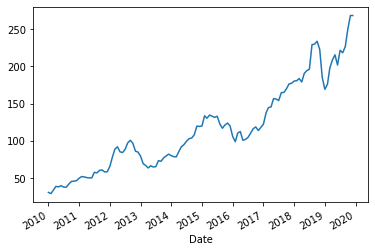

In [7]:
print(series.head())
series.plot()
pyplot.show()

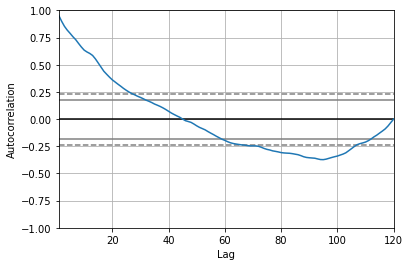

In [8]:
autocorrelation_plot(series)
pyplot.show()

In [16]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.High   No. Observations:                  119
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -409.863
Method:                       css-mle   S.D. of innovations              7.567
Date:                Tue, 26 May 2020   AIC                            833.726
Time:                        18:13:06   BIC                            853.180
Sample:                             1   HQIC                           841.626
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.9098      0.719      2.656      0.008       0.500       3.319
ar.L1.D.High     0.2698      0.091      2.966      0.003       0.092       0.448
ar.L2.D.High    -0.0815      0.093     -0.87

/home/avik/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/avik/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


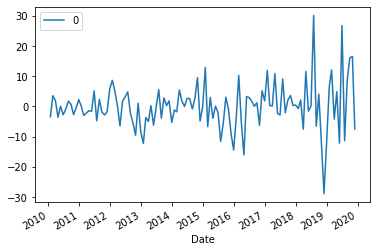

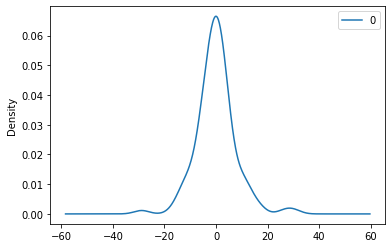

                0
count  119.000000
mean     0.005796
std      7.601254
min    -28.857107
25%     -3.654200
50%      0.044801
75%      2.996591
max     30.128365


In [17]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=106.699770, expected=110.230003
predicted=113.173134, expected=116.180000
predicted=114.205905, expected=118.690002
predicted=119.690906, expected=113.769997
predicted=113.308500, expected=118.019997
predicted=122.722378, expected=122.440002
predicted=124.147702, expected=137.479996
predicted=143.295787, expected=144.500000
predicted=143.176356, expected=145.460007
predicted=147.611914, expected=156.649994
predicted=162.569777, expected=155.979996
predicted=158.497297, expected=153.990005
predicted=157.785136, expected=164.520004
predicted=168.106911, expected=164.940002
predicted=166.593222, expected=169.649994
predicted=173.661958, expected=176.240005
predicted=176.248249, expected=177.199997
predicted=181.013733, expected=180.100006
predicted=182.449819, expected=180.619995
predicted=181.868485, expected=183.500000
predicted=187.537193, expected=178.940002
predicted=177.934784, expected=190.369995
predicted=196.283198, expected=194.199997
predicted=193.274928, expected=195

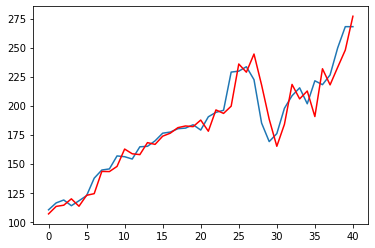

In [18]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

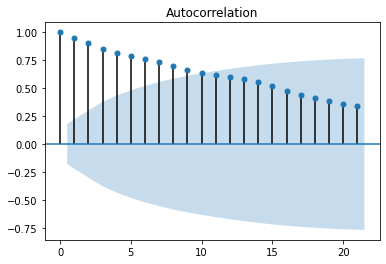

In [19]:
series = read_csv('AAPL.csv', header=0, parse_dates=[0], index_col=0, usecols=[0, 2], squeeze=True, date_parser=parser)
plot_acf(series)
pyplot.show()

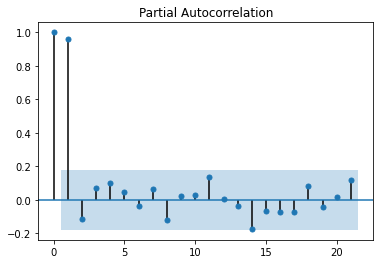

In [20]:
series = read_csv('AAPL.csv', header=0, parse_dates=[0], index_col=0, usecols=[0, 2], squeeze=True, date_parser=parser)
plot_pacf(series)
pyplot.show()

In [21]:
train, test = X[0:size], X[size:len(X)]

In [24]:
model = ARIMA(train, order=(1,1,0))
model_fit = model.fit(disp=0)
output = model_fit.predict(1, 4)
print(output)

[0.94246176 0.33175933 1.86522314 1.96104205]


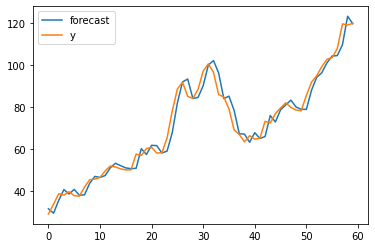

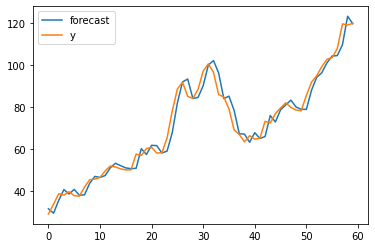

In [28]:
model_fit.plot_predict(1,60)